<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2022/blob/main/08/PTE_DL8_CAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning gyakorlat


## 8. gyakorlat: konvolúciós hálózat
### 2022. október 26.

# Osztályaktiválási térképek

Egy rövid implementáció az osztály aktivációs térképekhez:

Zhou et al, 2015: Learning Deep Features for Discriminative Localization    
https://arxiv.org/pdf/1512.04150.pdf

In [ ]:
import cv2
import pandas as pd
from PIL import Image
from tensorflow.keras import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!wget -q -O classes.txt https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
    
f = open('classes.txt')
imagenet_classes = eval(f.read())
f.close()

imagenet_classes

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [ ]:
model = ResNet50()
model.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
activation_maps = model.get_layer('conv5_block3_out').output
class_weights   = model.get_layer('predictions').weights[0].numpy()

model_vis = Model(model.input, [activation_maps, model.get_layer('predictions').output])

In [ ]:
def plot_class_act_map(img, class_id):
    # [None] is to make a match of 1 image
    preprocessed_input = preprocess_input(np.array(img)[None])
    maps, preds = model_vis.predict(preprocessed_input)
    
    # we have only 1 img in out batch
    class_activation_maps = (maps@class_weights)[0] #mátrix szórzás
    
    class_map = class_activation_maps[...,class_id]
    class_map = (class_map - class_map.min())/(class_map.max() - class_map.min())
    
    plt.figure(figsize=(8, 8), frameon=True)
    ext = 0, 1, 0, 1
    plt.title(imagenet_classes[class_id], fontsize=15)
    plt.imshow(img, extent=ext)
    plt.imshow(class_map, interpolation='quadric', 
               cmap=plt.cm.jet, vmin=0, vmax=1, alpha=0.5, extent=ext)
    plt.axis('off')
    plt.show()

#Magyarázat

In [ ]:
!wget -q -O img1.jpg https://kutyafan.hu/wp-content/uploads/2017/10/15-le%C3%ADrhatatlanul-aranyos-kever%C3%A9k-kutya5.jpg
img = Image.open('img1.jpg').resize((224, 224)) #kép átméretezése
preprocessed_input = preprocess_input(np.array(img)[None]) #numpy tömbbé alakítás
maps, preds = model_vis.predict(preprocessed_input) #a képere kiszámítjuk az aktivácuós térképeket és az előre jelzett osztályt
class_activation_maps = (maps@class_weights)[0] #összeszorozzuk az aktivációs térképeket a súlyokkal, itt kiszámoljuk az összes osztályra voantkozóan
class_map = class_activation_maps[...,207] # kiválasztjuk az osztálynak megfelelő class_map-et


1/1 [==============================] - 0s 222ms/step


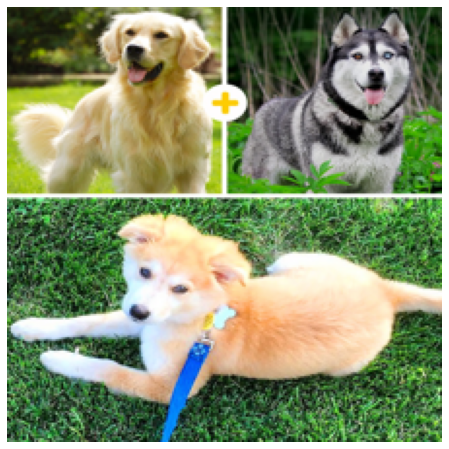

In [ ]:
!wget -q -O img1.jpg https://kutyafan.hu/wp-content/uploads/2017/10/15-le%C3%ADrhatatlanul-aranyos-kever%C3%A9k-kutya5.jpg

img = Image.open('img1.jpg').resize((224, 224))

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img)
plt.show()

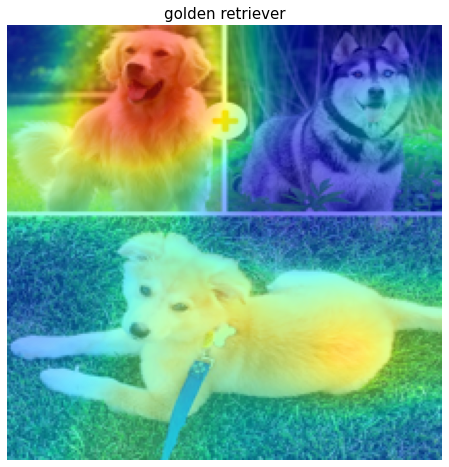

In [ ]:
plot_class_act_map(img, 207)

1/1 [==============================] - 2s 2s/step


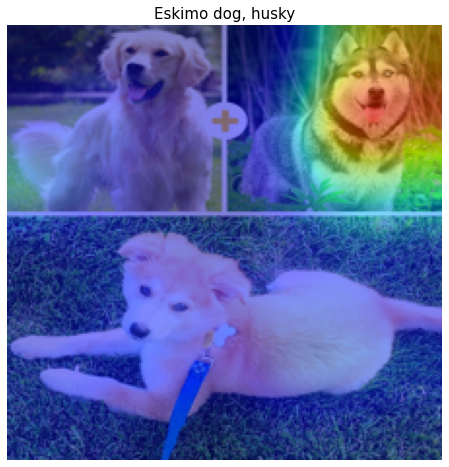

In [ ]:
plot_class_act_map(img, 248)

1/1 [==============================] - 0s 209ms/step


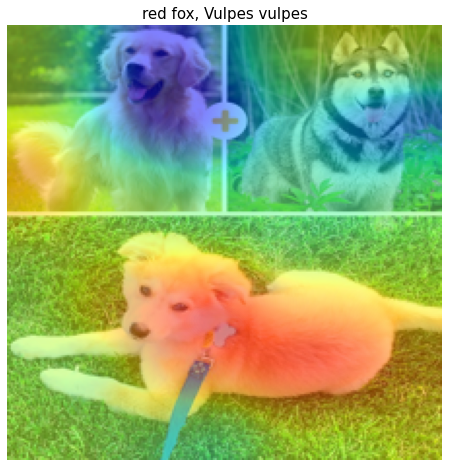

In [ ]:
plot_class_act_map(img, 277)

1/1 [==============================] - 0s 206ms/step


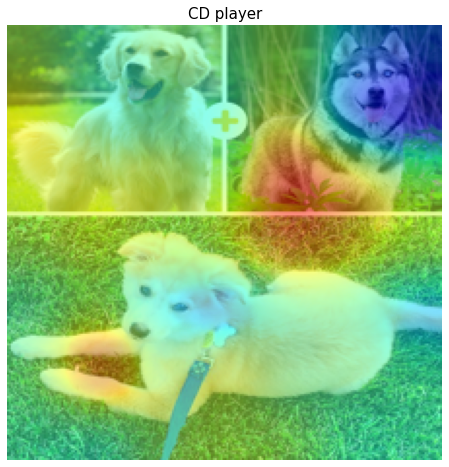

In [ ]:
plot_class_act_map(img, 485)

# Another example

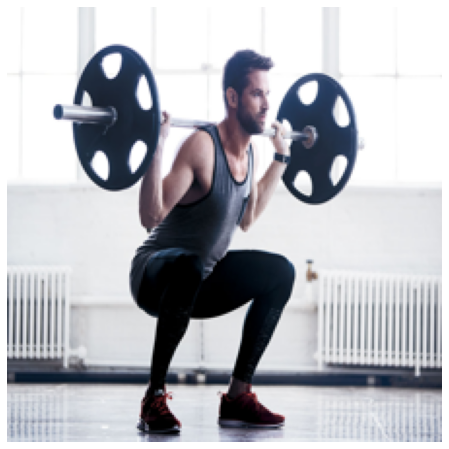

In [ ]:
!wget -q -O weight.jpg https://www.mensjournal.com/wp-content/uploads/mf/_main_liftlift.jpg
img = Image.open('weight.jpg').resize((224, 224))

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img)
plt.show()

Súlyzó

1/1 [==============================] - 0s 208ms/step


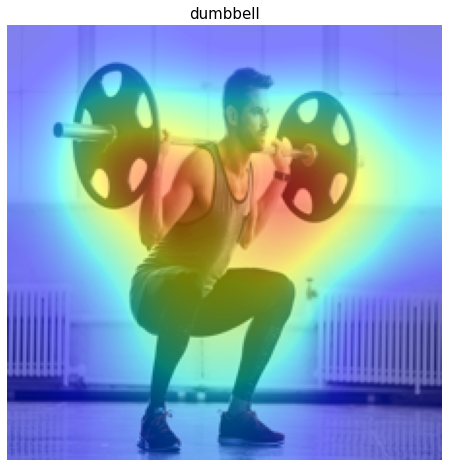

In [ ]:
plot_class_act_map(img, 543)

1/1 [==============================] - 0s 217ms/step


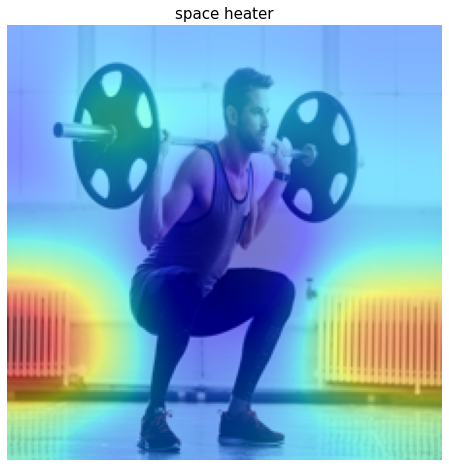

In [ ]:
plot_class_act_map(img, 811)

Does not work always as expected

1/1 [==============================] - 0s 206ms/step


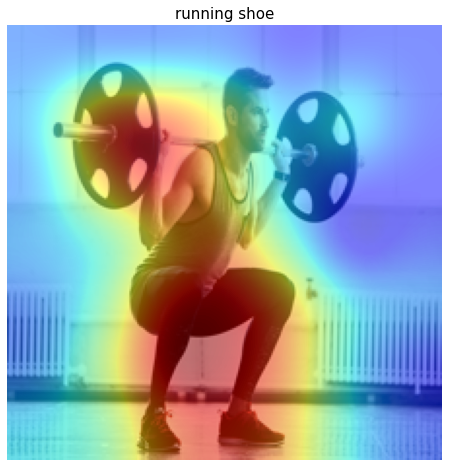

In [ ]:
plot_class_act_map(img, 770)